<a href="https://colab.research.google.com/github/Shubh-1107/Simple-Practice-Projects/blob/main/Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Required Libraries**

In [20]:
import pandas as pd
import numpy as np
import spacy

In [21]:
nlp = spacy.load('en_core_web_sm')

**Uploading the Dataset.**

In [29]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [30]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
data = data[['Label', 'EmailText']]

In [32]:
data['Label'] = data['Label'].apply(lambda x:0 if x=='ham' else 1)

In [35]:
data.head(11)

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [39]:
def process(x):
  temp = []
  document = nlp(x.lower())
  print(document)
  for i in document:
    if i.is_stop!=True and i.is_punct!=True:
      print(i)
      temp.append(i.lemma_)
      print(temp)
    else:
      pass

  return(' '.join(temp))      

In [40]:
data['EmailText'] = data['EmailText'].apply(lambda x: process(x))

Streaming output truncated to the last 5000 lines.
['dunno', 'leh', 'not', 'remember', 'mayb', 'lor', 'wat', 'time', 'r']
meeting
['dunno', 'leh', 'not', 'remember', 'mayb', 'lor', 'wat', 'time', 'r', 'meet']
tmr
['dunno', 'leh', 'not', 'remember', 'mayb', 'lor', 'wat', 'time', 'r', 'meet', 'tmr']
best msg: it's hard to be with a person, when u know that one more step foward will make u fall in love.. &amp; one step back can ruin ur friendship.. good night:-) ...
best
['good']
msg
['good', 'msg']
hard
['good', 'msg', 'hard']
person
['good', 'msg', 'hard', 'person']
u
['good', 'msg', 'hard', 'person', 'u']
know
['good', 'msg', 'hard', 'person', 'u', 'know']
step
['good', 'msg', 'hard', 'person', 'u', 'know', 'step']
foward
['good', 'msg', 'hard', 'person', 'u', 'know', 'step', 'foward']
u
['good', 'msg', 'hard', 'person', 'u', 'know', 'step', 'foward', 'u']
fall
['good', 'msg', 'hard', 'person', 'u', 'know', 'step', 'foward', 'u', 'fall']
love
['good', 'msg', 'hard', 'person', 'u', 'kno

In [42]:
data.head(11)

,Label,EmailText
0,0,jurong point crazy available bugis n great wor...
1,0,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun early hor u c
4,0,nah think go usf live
5,1,freemsg hey darle 3 week word like fun tb ok x...
6,0,brother like speak treat like aids patent
7,0,request melle melle oru minnaminunginte nurung...
8,1,winner value network customer select receivea ...
9,1,mobile 11 month u r entitle update late colour...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')

In [47]:
text_vector = vectorizer.fit_transform(data['EmailText'].values.tolist())

In [48]:
print(text_vector)

  (0, 7079)	0.19863129993143025
  (0, 1017)	0.35890799882424634
  (0, 1842)	0.3032069277494209
  (0, 1593)	0.34261647990985794
  (0, 3887)	0.3032069277494209
  (0, 7250)	0.24060094265073245
  (0, 3168)	0.1975304138199145
  (0, 1595)	0.3032069277494209
  (0, 1210)	0.2684514781881452
  (0, 2074)	0.2729205052435625
  (0, 5120)	0.257424652517704
  (0, 3779)	0.35890799882424634
  (1, 4793)	0.5647537939557097
  (1, 7173)	0.4459451111953121
  (1, 3746)	0.47451057922863127
  (1, 3921)	0.4218684931830353
  (1, 4769)	0.2811632882742994
  (2, 77)	0.2395244966956236
  (2, 1089)	0.17132935684973827
  (2, 5404)	0.16473274253951514
  (2, 6793)	0.1254671678341206
  (2, 6208)	0.2005836640243086
  (2, 5359)	0.16820504287497096
  (2, 5446)	0.16539371122554727
  (2, 775)	0.22517546975215236
  :	:
  (5567, 460)	0.24331799189705156
  (5567, 6762)	0.1924906650388016
  (5567, 4558)	0.25504800078010476
  (5567, 6617)	0.1645623122369073
  (5567, 5175)	0.2459387918665145
  (5567, 1848)	0.19354805892700622
  (556

In [50]:
import matplotlib.pyplot as plt 

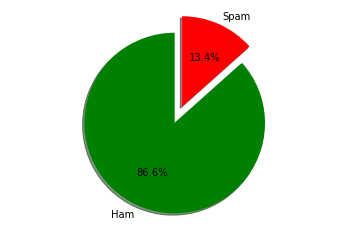

In [52]:
count_Class = pd.value_counts(data.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(text_vector.toarray(), data['Label'], test_size=0.2, random_state=20)

In [60]:
len(x_test)

1115

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [66]:
modelIB = BernoulliNB()
modelIB.fit(x_train, y_train)
print("Training Score of the model : ")
print(modelIB.score(x_train, y_train))

Training Score of the model : 
0.9845187345748261


In [64]:
y_predicted = modelIB.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of the model : ")
print(accuracy_score(y_test, y_predicted))

Accuracy Score of the model : 
0.9829596412556054
